<a href="https://colab.research.google.com/github/sargupta/Freelance/blob/master/Final_Extractive_Question_Answering_using_BERT_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

---


# **Concept Validation on Actual Questions**



1. List the questions 
2. Create a directory

    (a) Get text data from single doc (pdf2text)

    (b) Collect particular section of multiple docs

3. Test the model on (a)
4. Test the questions on (b)

## Extracting text data of single proposal

In [ ]:
!python -m pip install pdfminer.six


     |████████████████████████████████| 5.6MB 6.3MB/s 
     |████████████████████████████████| 2.6MB 44.2MB/s 


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}"'.format(name=fn))

Saving proposal-946221-PART_A.pdf to proposal-946221-PART_A (1).pdf
Saving proposal-946221-PART_B_Section_1.pdf to proposal-946221-PART_B_Section_1 (1).pdf
Saving proposal-946221-PART_B_Section_2.pdf to proposal-946221-PART_B_Section_2 (1).pdf


KeyError: ignored

In [ ]:
# miner_text_generator.py
import io
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage
def extract_text_by_page(pdf_path):
    with open(pdf_path, 'rb') as fh:
        for page in PDFPage.get_pages(fh, 
                                      caching=True,
                                      check_extractable=True):
            resource_manager = PDFResourceManager()
            fake_file_handle = io.StringIO()
            converter = TextConverter(resource_manager, fake_file_handle)
            page_interpreter = PDFPageInterpreter(resource_manager, converter)
            page_interpreter.process_page(page)
            text = fake_file_handle.getvalue()
            yield text
            # close open handles
            converter.close()
            fake_file_handle.close()
text_file = []
def extract_text(pdf_path):
    for page in extract_text_by_page(pdf_path):
        text_file.append(page)
    print(text_file)
if __name__ == '__main__':
    text_file.append(extract_text('proposal-946221-PART_B_Section_1.pdf'))



['     PAGE |1   Specialized meta-platform that integrates data, tools and knowledge for an efficient and profitable European farming sector  DETAILS OF APPLICANT Name of entitity Country Creation date Type of entity Geospatiumlab SL Spain 2007 Sociedad Limitada (private limited company)  Table of contents INTRODUCTION ............................................................................................................................................ 2 2. EXCELLENCE ......................................................................................................................................... 3 2.1 IDEA AND SOLUTION ........................................................................................................................... 3 2.2 INNOVATIVENESS ............................................................................................................................... 7 2.3 STAGE OF DEVELOPMENT.............................................................

In [ ]:
with open("file_bert.txt", "w") as output:
    output.write(str(text_file))

In [ ]:
qbfile = open("file_bert.txt", "r")

for aline in qbfile:
    values = aline.split("/",True)
    print(values)

qbfile.close()



["['     PAGE |1   Specialized meta-platform that integrates data, tools and knowledge for an efficient and profitable European farming sector  DETAILS OF APPLICANT Name of entitity Country Creation date Type of entity Geospatiumlab SL Spain 2007 Sociedad Limitada (private limited company)  Table of contents INTRODUCTION ............................................................................................................................................ 2 2. EXCELLENCE ......................................................................................................................................... 3 2.1 IDEA AND SOLUTION ........................................................................................................................... 3 2.2 INNOVATIVENESS ............................................................................................................................... 7 2.3 STAGE OF DEVELOPMENT...........................................................

In [ ]:
text_file


['     PAGE |1   Specialized meta-platform that integrates data, tools and knowledge for an efficient and profitable European farming sector  DETAILS OF APPLICANT Name of entitity Country Creation date Type of entity Geospatiumlab SL Spain 2007 Sociedad Limitada (private limited company)  Table of contents INTRODUCTION ............................................................................................................................................ 2 2. EXCELLENCE ......................................................................................................................................... 3 2.1 IDEA AND SOLUTION ........................................................................................................................... 3 2.2 INNOVATIVENESS ............................................................................................................................... 7 2.3 STAGE OF DEVELOPMENT.............................................................

In [ ]:
type(text_file)

list

In [ ]:
!pip install str

  Created wheel for str: filename=str-0.1-cp36-none-any.whl size=1153 sha256=57ec65a77b1f37ba5f03549a54ab6032b0e2f61a5091a9785cb0738641302466
  Stored in directory: /root/.cache/pip/wheels/5f/32/f9/9002aff1e089937c0375a445dfeb9084f1617a378a0403b318
Successfully built str


# Visualisation of the Content through WordCloud

In [ ]:
!pip install matplotlib
!pip install pandas
!pip install wordcloud

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
import re

text = re.sub(r'==.*?==+', '', pure_text)
text = text.replace('\n', '')

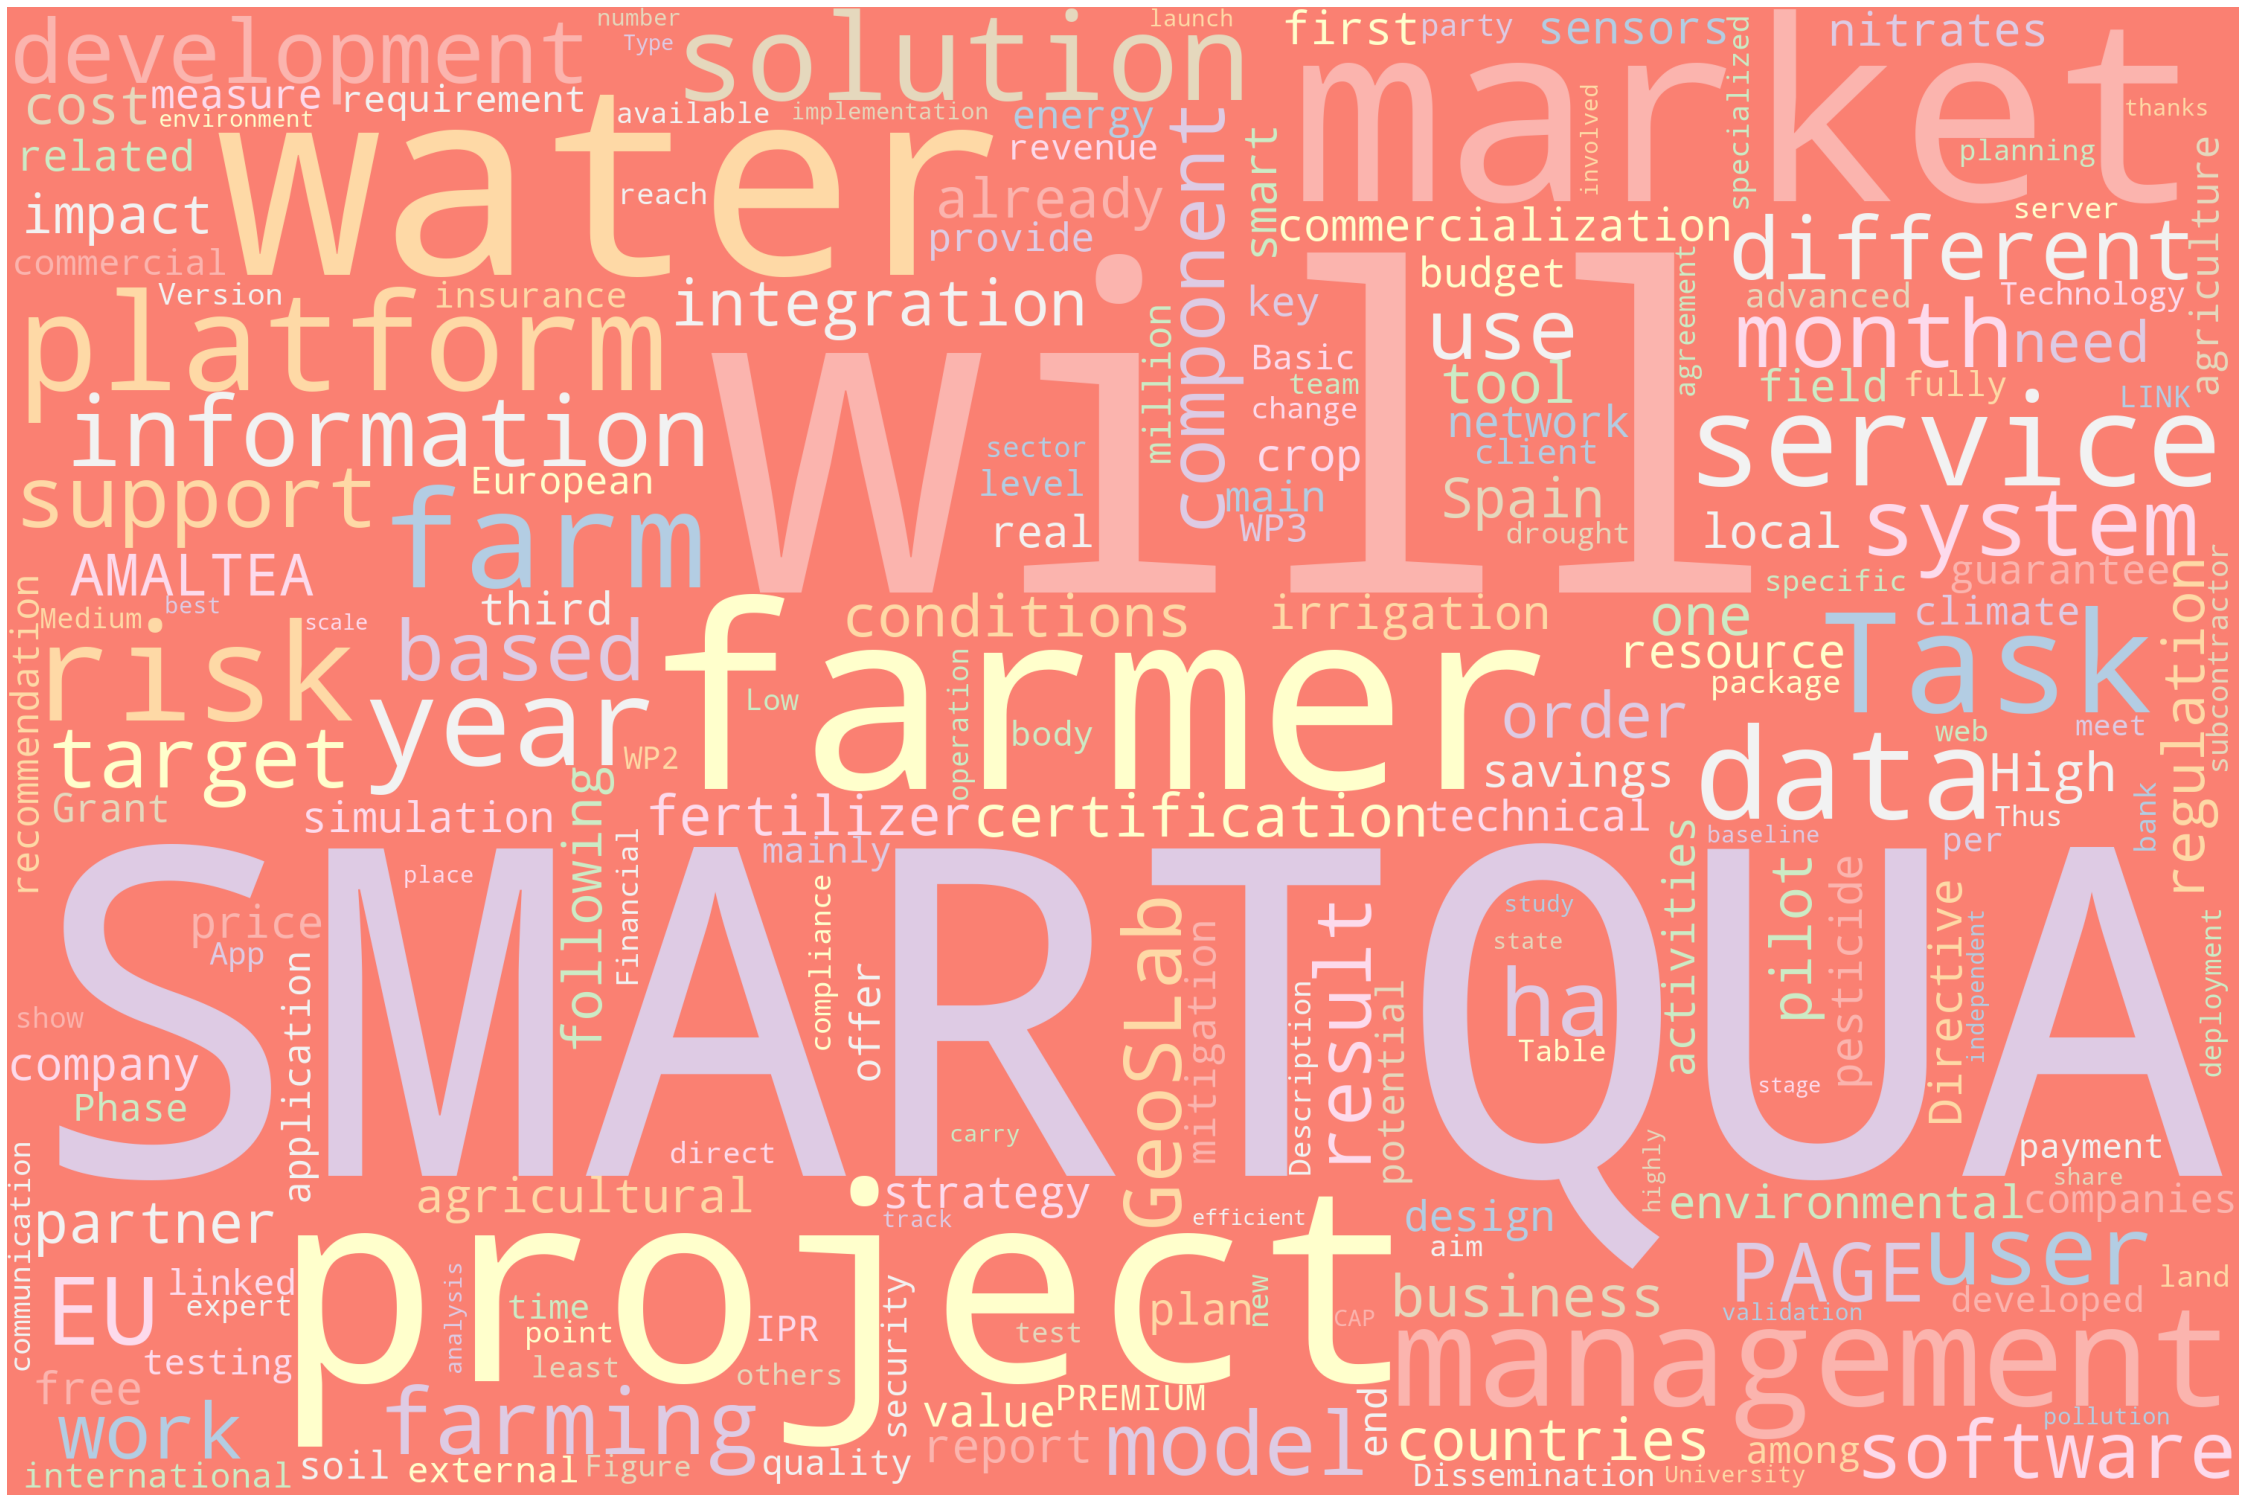

In [ ]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

# An attempt to test the questions over the ENTIRE text file

In [ ]:
from functools import reduce
res = [i for i in text_file if i] 

pure_text = str(reduce(lambda x,y: x+" "+y, res))

pure_text

'     PAGE |1   Specialized meta-platform that integrates data, tools and knowledge for an efficient and profitable European farming sector  DETAILS OF APPLICANT Name of entitity Country Creation date Type of entity Geospatiumlab SL Spain 2007 Sociedad Limitada (private limited company)  Table of contents INTRODUCTION ............................................................................................................................................ 2 2. EXCELLENCE ......................................................................................................................................... 3 2.1 IDEA AND SOLUTION ........................................................................................................................... 3 2.2 INNOVATIVENESS ............................................................................................................................... 7 2.3 STAGE OF DEVELOPMENT..............................................................

In [ ]:
' '.join(pure_text.split()[:700])

'PAGE |1 Specialized meta-platform that integrates data, tools and knowledge for an efficient and profitable European farming sector DETAILS OF APPLICANT Name of entitity Country Creation date Type of entity Geospatiumlab SL Spain 2007 Sociedad Limitada (private limited company) Table of contents INTRODUCTION ............................................................................................................................................ 2 2. EXCELLENCE ......................................................................................................................................... 3 2.1 IDEA AND SOLUTION ........................................................................................................................... 3 2.2 INNOVATIVENESS ............................................................................................................................... 7 2.3 STAGE OF DEVELOPMENT.......................................................................

In [ ]:
testing_only = """
Asia (/ˈeɪʒə, ˈeɪʃə/ (About this soundlisten)) is Earth's largest and most populous continent, located primarily in the Eastern and Northern Hemispheres. It shares the continental landmass of Eurasia with the continent of Europe and the continental landmass of Afro-Eurasia with both Europe and Africa. Asia covers an area of 44,579,000 square kilometres (17,212,000 sq mi), about 30% of Earth's total land area and 8.7% of the Earth's total surface area. The continent, which has long been home to the majority of the human population,[5] was the site of many of the first civilizations. Asia is notable for not only its overall large size and population, but also dense and large settlements, as well as vast barely populated regions. Its 4.5 billion people (as of June 2019) constitute roughly 60% of the world's population.[6]

In general terms, Asia is bounded on the east by the Pacific Ocean, on the south by the Indian Ocean, and on the north by the Arctic Ocean. The border of Asia with Europe is a historical and cultural construct, as there is no clear physical and geographical separation between them. It is somewhat arbitrary and has moved since its first conception in classical antiquity. The division of Eurasia into two continents reflects East–West cultural, linguistic, and ethnic differences, some of which vary on a spectrum rather than with a sharp dividing line. The most commonly accepted boundaries place Asia to the east of the Suez Canal separating it from Africa; and to the east of the Turkish Straits, the Ural Mountains and Ural River, and to the south of the Caucasus Mountains and the Caspian and Black Seas, separating it from Europe.[7]

China and India alternated in being the largest economies in the world from 1 to 1800 CE. China was a major economic power and attracted many to the east,[8][9][10] and for many the legendary wealth and prosperity of the ancient culture of India personified Asia,[11] attracting European commerce, exploration and colonialism. The accidental discovery of a trans-Atlantic route from Europe to America by Columbus while in search for a route to India demonstrates this deep fascination. The Silk Road became the main east–west trading route in the Asian hinterlands while the Straits of Malacca stood as a major sea route. Asia has exhibited economic dynamism (particularly East Asia) as well as robust population growth during the 20th century, but overall population growth has since fallen.[12] Asia was the birthplace of most of the world's mainstream religions including Hinduism, Zoroastrianism, Judaism, Jainism, Buddhism, Confucianism, Taoism, Christianity, Islam, Sikhism, as well as many other religions.
"""

In [ ]:
' '.join(testing_only.split()[300:1000])

"attracted many to the east,[8][9][10] and for many the legendary wealth and prosperity of the ancient culture of India personified Asia,[11] attracting European commerce, exploration and colonialism. The accidental discovery of a trans-Atlantic route from Europe to America by Columbus while in search for a route to India demonstrates this deep fascination. The Silk Road became the main east–west trading route in the Asian hinterlands while the Straits of Malacca stood as a major sea route. Asia has exhibited economic dynamism (particularly East Asia) as well as robust population growth during the 20th century, but overall population growth has since fallen.[12] Asia was the birthplace of most of the world's mainstream religions including Hinduism, Zoroastrianism, Judaism, Jainism, Buddhism, Confucianism, Taoism, Christianity, Islam, Sikhism, as well as many other religions."

In [ ]:
sentences = pure_text.split(".")

for sentence in sentences[50:]:
#    qa_result(questions, sentence)
    print(sentence)
#    find_the_answer(sentence)



























































































 2 2
 EXCELLENCE 








































































































































 3 2
1 IDEA AND SOLUTION 


























































































































 3 2
2 INNOVATIVENESS 






























































































































 7 2
3 STAGE OF DEVELOPMENT




















































































































 9 2
4 FEASIBILITY AND RISKS























































































































11 3
 IMPACT 














































































































































14 3
1 MARK

In [ ]:
sentences = pure_text.split()
#for sentence in split_sen:

 #   print(sentence)
#    qa_result(questions, sentence)

#for sentence in pure_text[25:]:
    #print(sentence)
   #qa_result(questions, sentence)

In [ ]:
def word_iter_stringio(filename):
    start = time.time()
    with open(filename) as f:
        io = StringIO(f.read())
    for line in io:
        for word in line.split():
            yield word
    print 'iter_io took %0.6f seconds' % (time.time() - start)
word_iter_stringio(pure_text)

<generator object word_iter_stringio at 0x7f5c79b59e08>

## Imports

In [ ]:
!pip install transformers


     |████████████████████████████████| 1.4MB 8.4MB/s 
     |████████████████████████████████| 2.9MB 16.8MB/s 
     |████████████████████████████████| 890kB 48.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=b139d6ee8249c40d68065db8cfe9863f028d386c3f32543383d67fd1f7eb8d22
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
from transformers import pipeline
from transformers import *
import tensorflow as tf
tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
model = TFAutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad", return_dict=True)


All model checkpoint layers were used when initializing TFBertForQuestionAnswering.

All the layers of TFBertForQuestionAnswering were initialized from the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForQuestionAnswering for predictions without further training.


## Key Function

In [ ]:
def qa_result(questions, text_data):
    for question in questions:
        inputs = tokenizer(question, text_data, add_special_tokens=True, return_tensors="tf")
        input_ids = inputs["input_ids"].numpy()[0]
        text_tokens = tokenizer.convert_ids_to_tokens(input_ids)
        output = model(inputs)
        answer_start = tf.argmax(
            output.start_logits, axis=1
        ).numpy()[0]  # Get the most likely beginning of answer with the argmax of the score
        answer_end = (
            tf.argmax(output.end_logits, axis=1) + 1
        ).numpy()[0]  # Get the most likely end of answer with the argmax of the score
        answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))
        print(f"Question: {question}")
        print(f"Answer: {answer}")

# Type: 1 
##**Tests on various sections of the document**

Here we will test a set of questions of same document to discover the most suitable section for a specific question.

### *Questions*

In [ ]:
questions = ["What's the name of the company?", #which company it refers to in the given paragraph
            "What are the financial needs of the companies?",
            "Who is the CEO of the company?",
            "To which area of Sustainable Development Goals (SDG) are they contributing?",
            "Were they supported in the past by the EU research project?",
             "What type of company it is?", 
             "What is the funding required for the company?" 
             ]

**General Questions**

In [ ]:
General_questions = ["What are the next round financial needs of the company?",
"Is the company a university spin-off?",
"Who is the CEO of the company and is she female?",
"Does the company have a female CEO?",
"To which area of Sustainable Development Goals (SDG) are they contributing?"
]

### *Part 1*

In [ ]:
test_intro = """
GeoSLab (legal full name of GeoSpatiumLab SL) is a high-tech Spanish SME specialized in
digital processing and modelling of geospatial and georeferenced information and in the
development of advanced software and mobile Apps with an especial focus on water and
farm management.
To guarantee the interoperability and scalability of our solutions, we work following international standards such as the INSPIRE Directive. Thus, our developments can function on their own or together with other software building more potent and integrated systems.
We have a wide portfolio of clients, ranging from public authorities (Hydrographic confederations and Spanish national and regional bodies) to private companies (mainly environmental consultancy or engineering companies). We develop ad-hoc solutions for these entities (e.g. we are the developers of the water information systems of Oman and of the Spanish region of Álava) as well as we develop our own-solutions to be commercially exploited by us. An example is AGROSLAB, a web platform to support farmers with the application of pesticides and fertilizers on farms and support on regulatory requirements of the CAP. It already has more than 12,000 users and its being a complete success: since its market launch in 2014, revenues generated have grown exponentially (e.g. by 60 % between 2017 and 2018).

"""

In [ ]:
qa_result(questions, test_intro)

Question: What's the name of the company?
Answer: geoslab
Question: What are the financial needs of the companies?
Answer: private companies ( mainly environmental consultancy or engineering companies )
Question: Who is the CEO of the company?
Answer: [CLS]
Question: To which area of Sustainable Development Goals (SDG) are they contributing?
Answer: water and farm management
Question: Were they supported in the past by the EU research project?
Answer: [CLS]
Question: What type of company it is?
Answer: high - tech spanish sme
Question: What is the funding required for the company?
Answer: [CLS]
Question: Were they supported in the past by the EU research project
Answer: [CLS] were they supported in the past by the eu research project [SEP]




---

**Note:** 

The name of the company depends on the context provided so does the other answers. 
If the given paragraph discussed about a different company, it will recognise it as a new company name and will forget about the any name mentioned earlier due to the 'Long-short term memory' of the algorithm. 

---



In [ ]:
for question in questions:
    inputs = tokenizer(question, test_intro, add_special_tokens=True, return_tensors="tf")
    input_ids = inputs["input_ids"].numpy()[0]
    text_tokens = tokenizer.convert_ids_to_tokens(input_ids)
    output = model(inputs)
    answer_start = tf.argmax(
        output.start_logits, axis=1
    ).numpy()[0]  # Get the most likely beginning of answer with the argmax of the score
    answer_end = (
        tf.argmax(output.end_logits, axis=1) + 1
    ).numpy()[0]  # Get the most likely end of answer with the argmax of the score
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))
    print(f"Question: {question}")
    print(f"Answer: {answer}")

### *Part 2*

In [ ]:
test_certification = """
SMARTQUA’s capabilities to reduce the environment impact of agriculture will be certified under an independent certification body. Based on the “Codes of Good Agricultural Practices” published by the Ministries of Agriculture of the different EU countries, we will identify measures to which SMARTQUA contributes positively (mainly related to water savings, fertilizer savings and nitrates pollution prevention). For each measure identified, we will establish target values (e.g. less than 600 m3 of water per tonne of maize produced or no more than 50 kg/ha of complex NPK 15:15:15 fertilizer) and the external certification body will audit the validation of SMARTQUA to achieve these target values (during Task 3.6). This will result in a “quality seal” granted by an acknowledged certification body, recognized by farmers and stakeholders of the farming sector.

"""

In [ ]:
qa_result(questions, test_certification)

Question: What's the name of the company?
Answer: smartqua
Question: What are the financial needs of the companies?
Answer: water savings, fertilizer savings and nitrates pollution prevention
Question: What's the name of the CEO?
Answer: [SEP]
Question: To which area of SDG are they contributing?
Answer: water savings, fertilizer savings and nitrates pollution prevention
Question: Were they supported in the past by the EU research project?
Answer: supported in the past by the eu research project? [SEP]
Question: What type of company it is?
Answer: smartqua ’ s capabilities to reduce the environment impact of agriculture will be certified under an independent certification body. based on the “ codes of good agricultural practices ” published by the ministries of agriculture of the different eu countries, we will identify measures to which smartqua contributes positively ( mainly related to water savings, fertilizer savings and nitrates pollution prevention ). for each measure identified

**Note:** 
None of the answers except the company name is relevant (or appropriate) in the given context from Certification section.

### *Part 3*

In [ ]:
text_solution = """
Our solution SMARTQUA is a meta-platform or, in another words,
a platform of platforms. Based on geolocation and dynamic
transfer of key elements related to agronomic production, it
brings the smart farming concept to the next level. To do so, we
integrate different platforms with a proven track record, gather
in-field and external information (e.g. soil properties, EU
regulation in force...) and make use of advanced simulation
models. This way, we offer farmers the first one-stop-shop digital
platform of platforms where they can find in a single place the tools that they need for an efficient farm management. It is an expert system that generates new knowledge and value at an exponential rate.
Simply put, SMARTQUA transfer to a digital dimension all the elements, relationships and balances found in an agricultural system, with the aim of enhancing farmers’ competitiveness whilst minimizing the environmental impact.

"""

In [ ]:
qa_result(questions, text_solution)

Question: What's the name of the company?
Answer: smartqua
Question: What are the financial needs of the companies?
Answer: [SEP] our solution smartqua is a meta - platform or, in another words, a platform of platforms. based on geolocation and dynamic transfer of key elements related to agronomic production, it brings the smart farming concept to the next level. to do so, we integrate different platforms with a proven track record, gather in - field and external information ( e. g. soil properties, eu regulation in force... ) and make use of advanced simulation models. this way, we offer farmers the first one - stop - shop digital platform of platforms where they can find in a single place the tools that they need for an efficient farm management. it is an expert system that generates new knowledge and value at an exponential rate. simply put, smartqua transfer to a digital dimension all the elements, relationships and balances found in an agricultural system, with the aim of enhancin

In [ ]:
#from collections import Counter
#cn = Counter(text_file)

#for k,v in cn.items():
#    print("[{}][{}]".format(k,v))


### *Part 4*

In [ ]:
text_future_plan = """
In order to reach the TRL-8 during the SME-Instrument Phase 2, we have scheduled a 24-month work-plan with a total budget of 2 M€. Main activities to be carried out are:
 Integration and optimization of SMARTQUA components (WP1). This includes the integration of the different software components (HYDROSPATIUM, AQUATOOL and AGROSLAB) within SMARTQUA platform + the integration of the hardware components (sensors, SCADA and remote information systems). Once integrated, we will conduct small trials in semi-operational conditions (Watering Community of Alto Aragon, which is the largest watering community in the EU, see Letter of Commitment in Annex 3). Based on the feedback obtained, SMARTQUA Beta Version will be obtained.
 Qualification of SMARTQUA to reach commercial version (WP2). Large scale pilots in Spain (at least 10 farms) and Portugal (at least 5 farm) under real conditions will take place. For a 9-month period, we will gather in-field information that will be used to run SMARTQUA hydrological, agronomic and climatic simulation models. This way, we will validate in a real environment our solution’s coherence of the results calculated by the models (irrigation, pesticides and fertilizer optimization + drought forecasting and management). Feedback will be used to fine-tune the platform and reach the commercial version.
 Preparation for commercialization and exploitation (WP3). During the whole project we will carry out business development activities such as meetings with stakeholders (public authorities, specialized agencies...), organization of workshops and focus groups with target users (farmers), communication through social media...
 SMARTQUA certification (WP3). We consider that building trust is a key element for a successful recognition and adoption of our solutions. Therefore, SMARQUA results will be certified by an independent certification body. This certification will be used to demonstrate technical performances, under an accredited verified scheme. The key parameter that will be verified is the number of irrigation operations with zero infiltration of lixiviates (excess of irrigation waters fertilizers and pesticides). The verification process will be applied to one pilot test farm in Spain (80 ha) where two sections will be monitored: one under SMARTQUA services and other one without as a baseline reference.

"""

 Added the question 'What is the budget of the company?'

In [ ]:
qa_result(questions, text_future_plan)

Question: What's the name of the company?
Answer: [CLS] what's the name of the company? [SEP]
Question: What are the financial needs of the companies?
Answer: [CLS]
Question: What's the name of the CEO?
Answer: [CLS] what's the name of the ceo? [SEP]
Question: To which area of SDG are they contributing?
Answer: [CLS] to which area of sdg are they contributing? [SEP]
Question: Were they supported in the past by the EU research project?
Answer: [CLS]
Question: What type of company it is?
Answer: [CLS] what type of company it is? [SEP]
Question: What is the budget of the company?
Answer: 
Question: What is the expected revenue of the company?
Answer: [CLS]


### *Part 5*

In [ ]:
text_target_market = """
Our solution is part of the “smart farming market”, which was worth globally 6.8 B€ in 2018 and is expected to grow at a CAGR of 12 % until 2025, reaching a value of 15.4 B€ by then7.
Within this market, we are targeting the “farm management software market”, that accounted for a 19 % share of the “smart agriculture market” in 2018. This niche is expected to grow at a higher pace, with a CAGR of 17 % until 2025. Thus, the value of the “farm management software market” will be of 4.22 B€ and will account for a share of 25 % of the overall “smart agriculture market” by 20258.
Drivers of this market are the need to shift to more efficient farming methods able to cope with the challenges that the agricultural sector is facing, including enhancing climate change resilience and feeding a growing population without jeopardizing natural resources (e.g. water resources quantity and quality).

"""

In [ ]:
qa_result(questions, text_target_market)

Question: What's the name of the company?
Answer: farm management software
Question: What are the financial needs of the companies?
Answer: feeding a growing population without jeopardizing natural resources
Question: What's the name of the CEO?
Answer: [SEP]
Question: To which area of SDG are they contributing?
Answer: agricultural sector
Question: Were they supported in the past by the EU research project?
Answer: [SEP]
Question: What type of company it is?
Answer: 
Question: What is the budget of the company?
Answer: 6. 8 b€
Question: What is the expected revenue of the company?
Answer: 6. 8 b€


### *Part 6*

In [ ]:
¢text_commercialization_strategy = """
Our business model is a B2B (business-to-business) based on the following revenue streams:
1. Fees from farmers purchasing SMARTQUA services. We offer three different levels of subscription:
- FREE service is free of charge and provides non-customized recommendations based on open data.
- BASIC service, with a yearly fee of 0.8 € per hectare & month, delivers non-customized
recommendations based on agronomical and hydrological models, depending on regional data and
conditions.
- PREMIUM service provides customized recommendations for farm management based on
information gathered from the field. The fee is of 5.5 € per hectare & month during the first five years and 1.25 € per hectare & month onwards. The higher costs during the first five years are related to the higher cost of deployment associated to premium services (i.e. soil samples analyses, placing of sensors, models calibration...).
2. Business Intelligences. Fees from insurance companies/banks buying SMARTQUA reports at 1,000 €/each.
There will be different options adapted to the needs of our clients:
- Year subscription: 1 report every 3 months at 5,000 €/year
- Individual annual report: 2,000 €


"""

In [ ]:
qa_result(questions, text_commercialization_strategy)

Question: What's the name of the company?
Answer: [CLS]
Question: What are the financial needs of the companies?
Answer: [CLS] what are the financial needs of the companies? [SEP] our business model is a b2b ( business - to - business ) based on the following revenue streams : 1. fees from farmers purchasing smartqua services. we offer three different levels of subscription : - free service is free of charge and provides non - customized recommendations based on open data. - basic service, with a yearly fee of 0. 8 € per hectare & month, delivers non - customized recommendations based on agronomical and hydrological models, depending on regional data and conditions. - premium service provides customized recommendations for farm management based on information gathered from the field. the fee is of 5. 5 € per hectare & month during the first five years and 1. 25 € per hectare & month onwards. the higher costs during the first five years are related to the higher cost of deployment assoc

### *Part 7*

In [ ]:
text_financial_needs = """
The funding requirements to launch SMARTQUA to the marker are of 1.6 M€ and the time-to-market is of 2 years (equivalent to the budget and duration of the Phase 2).
To co-finance the 30 % of the budget not covered by the EU grant and to carry out the market deployment activities (from TRL8 to TRL9, estimated financing needs of 300,000 €) we will allocate our own-resources as well as we are already negotiating a bank loan from the Spanish bank Agrobank from CaixaBank.

"""

Added 'What is the expected revenue of the company?'


In [ ]:
qa_result(questions, text_financial_needs)

Question: What's the name of the company?
Answer: smartqua
Question: What are the financial needs of the companies?
Answer: 300, 000 €
Question: Who is the CEO of the company?
Answer: 
Question: To which area of Sustainable Development Goals (SDG) are they contributing?
Answer: market deployment activities ( from trl8 to trl9
Question: Were they supported in the past by the EU research project?
Answer: not covered by the eu grant and to carry out the market deployment activities ( from trl8 to trl9
Question: What type of company it is?
Answer: smartqua
Question: What is the funding required for the company?
Answer: 1. 6 m€
Question: Were they supported in the past by the EU research project
Answer: to co - finance the 30 % of the budget not covered by the eu grant




---

## --> **We have the Answer for the financial needs** 
In this case it's: 300, 000 €


---



# Type 2

## Same question over same/similar section of different documents

We will be focusing on the financial needs section as out of five, "What are the financial needs of the company?" can take us to a specific answer.

## Questions

In [ ]:
Question_set_2 = ["What is the funding required for the company?",
"What are the financial needs of the company?"
]

## Financial Needs

### Part 1

In [ ]:
#Financial Needs
fn_smart_aqua = """
The funding requirements to launch SMARTQUA to the marker are of 1.6 M€ and the time-to-market is of 2 years (equivalent to the budget and duration of the Phase 2).
To co-finance the 30 % of the budget not covered by the EU grant and to carry out the market deployment activities (from TRL8 to TRL9, estimated financing needs of 300,000 €) we will allocate our own-resources as well as we are already negotiating a bank loan from the Spanish bank Agrobank from CaixaBank.
"""

gmScan: doesn't provide funancial requirements inside text, it's in the form of table.

In [ ]:
#Budget
fn_antoferin = """
The total budget that Antofénol will require for the execution of the Phase 2 project of Antoferine is €2.94 million. Subcontracted services will account for 17% of the budget (see Annex 3 for details on subcontracted tasks and best value for money principle) while personnel and material costs will constitute another 20% and 18% of the total budget, respectively (figure 3.6). Indirect costs will account for an extra 17%, equipment for 8% and travel for 1%.
As shown in table 3.f., the Phase 2 project will entail 121 person months, with an average personnel moth cost of €4,980.27. This amounts to a total of €602,613 in personnel costs.
The H2020 SME instrument covers 70% of the total budget so we will request €2.06 million as grant for Phase 2 project development.
"""

In [ ]:
#Executive Summary
es_sparters= """
The estimated funding required to reach commercialization is €2.3million whereof this project demands for 70% of the budget, 30% is funded by our own resources, our business angel and innovation creditof RVO.The business caseis strong for asparagus farmersas well forCerescon. The Sparteris modular developed and can be delivered according to user’s needs. An asparagus farmer thatbuysSparterfor €500.000has apayback in just 2 seasons and hasnet extra revenue of €430.000 each season (compared to manual harvesting). Targeted usersare initially European white asparagus farmers, which is a 900 million euro market. First priority is to start selling in Germany, Franceand the Netherlands, followed by Spain, Greece, Italy and in the rest of world. In five yearsthis will result in the sales of 150 Sparterand€81.3mlnin revenue. With associated EBITDA of €27.3mlnleading to a return on investment of 1:12. We have already customers, organised in our Asparagus User  Group; and  established  a  strong  agent  network  throughout  Europe  via  partnerships  with  agricultural machinery  sellers. Extensive  market  research  showedno significant market  barriers,  no  legal  or  regulatory issues and full Freedom to Operate.Only 2 competitorsexist, but they do not offer acommercially available machine. We have created high market barriers for them and others by patenting our key technologies.

"""

In [ ]:
#Opportunity Summary 
os_avectas = """
Avectas aims, within five years, to establish Solupore® as the leading clinical vector-free technology for cell engineering
• Avectas will initially seed the technology in bench top form via feasibility studies for research and early development purposes and will in parallel develop clinical and commercial scale platform for licensing
• Revenue will be generated through funded feasibility studies, license and development fees, milestone payments and product royalties
• Revenues forecasted at €37.5M in 2024
• Avectas are seeking €10 million investment in
2018
• Contact CEO, Dr. Michael Maguire mmaguire@avectas.com

"""

In [ ]:
qa_result(Question_set_2, fn_smart_aqua)

Question: What is the funding required for the company?
Answer: 1. 6 m€
Question: What are the financial needs of the company?
Answer: 1. 6 m€ and the time - to - market is of 2 years ( equivalent to the budget and duration of the phase 2 ). to co - finance the 30 % of the budget not covered by the eu grant and to carry out the market deployment activities ( from trl8 to trl9, estimated financing needs of 300, 000 €


In [ ]:
qa_result(Question_set_2, fn_antoferin)

Question: What is the funding required for the company?
Answer: €2. 94 million
Question: What are the financial needs of the company?
Answer: subcontracted services will account for 17 % of the budget ( see annex 3 for details on subcontracted tasks and best value for money principle ) while personnel and material costs


In [ ]:
qa_result(Question_set_2, es_sparters)

Question: What is the funding required for the company?
Answer: €2. 3million
Question: What are the financial needs of the company?
Answer: 70 % of the budget


In [ ]:
qa_result(Question_set_2, os_avectas)

Question: What is the funding required for the company?
Answer: €10 million
Question: What are the financial needs of the company?
Answer: revenue will be generated through funded feasibility studies, license and development fees, milestone payments and product royalties
